In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(900, 1600, 3)
<class 'numpy.ndarray'>
(25560, 3)
(120, 213, 3)


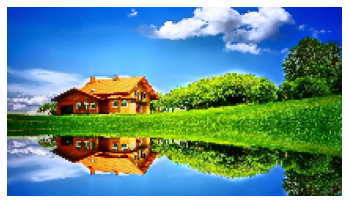

In [2]:
image = cv2.imread("img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
r, c = image.shape[:2]
out_r = 120
image = cv2.resize(image, (int(out_r*float(c)/r), out_r))
print(type(image))
pixels = image.reshape((-1, 3))
print(pixels.shape)
print(image.shape)
plt.axis("off")
plt.imshow(image)

In [3]:
km = KMeans(n_clusters=10)
km.fit(pixels)

KMeans(n_clusters=4)

In [4]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
print(colors)

[[ 41 120 218]
 [148 177  36]
 [157 200 240]
 [ 42  69  13]]


In [5]:
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]
percentage

array([0.33779344, 0.19827856, 0.19311424, 0.27081376], dtype=float32)

# Dominant Colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


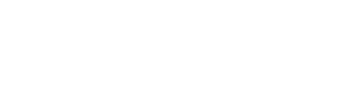

In [6]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow(patch)
plt.show()

In [7]:
dom = [[percentage[ix], colors[ix]] for ix in range(km.n_clusters)]
dominance = sorted(dom, key=lambda x:x[0], reverse=True)

# Dominance

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


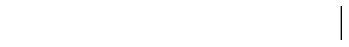

In [8]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(dominance[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - dominance[cx][1]
    start = end
plt.imshow(patch)
plt.show()

In [9]:
for px in range(pixels.shape[0]):
    for ix in range(colors.shape[0]):
        pixels[px] =colors[km.labels_[px]]

In [10]:
img = pixels.reshape(out_r, -1, 3)
print(img.shape)

(120, 213, 3)


# Image Regeneration with k centers

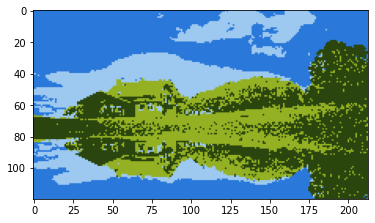

In [11]:
plt.imshow(img)